### Visualization using Pie Chart 

Import the required packages. 

In [1]:
import pygal
import pandas as pd

Read the csv file using pandas. Wine dataset is used here.

In [2]:
wine_dataframe = pd.read_csv('../datasets/winequality-red.csv', 
                             sep=';')

Inspect the dataset. The first few rows are printed and summary is printed using describe(). The focus here is on the quality of the wines and their number. The quality of wine is categorized into "Below Average", "Average", "Good". 

** The Categorization is as follows ** - 
-  Wine that has quality ** rating 8 and greater ** would be considered as **"Good"**. 
-  Wine that has quality **rating 5 and till 7 ** would be considered as **"Average"**.
-  Wine that has quality **rating 4 and below ** would be considered as **"Below Average"**.

All this would be plotted on a Pie Chart 

In [3]:
wine_dataframe.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
wine_dataframe.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


Total no of wines

In [5]:
num_wines = len(wine_dataframe)
num_wines

1599

Here, loc() method is used. It is used in two ways -
- locating rows and columns using name 
- locating rows and clomns based on boolean condition. 
The second way is used here. Below rows are selected where 'quality' is greate than '7' and it is stored a dataframe. Then, length (rows) of the dataframe is used. 

In [6]:
counts_df = wine_dataframe.groupby(['quality']).size()

counts_df

quality
3     10
4     53
5    681
6    638
7    199
8     18
dtype: int64

In [7]:
num_high_quality = counts_df[7] + counts_df[8]
num_high_quality

217

In [8]:
num_low_quality = counts_df[3] + counts_df[4]
num_med_quality = counts_df[5] + counts_df[6]

In [9]:
print('Total wines: ', num_wines)
print('High Quality wines : ', num_high_quality)
print('Medium Quality wines : ', num_med_quality)
print('Low Quality wines : ', num_low_quality)

Total wines:  1599
High Quality wines :  217
Medium Quality wines :  1319
Low Quality wines :  63


In [10]:
from pygal.style import DarkStyle

In [11]:
pie_chart = pygal.Pie(width = 640,
                      height = 360,
                      explicit_size = True,
                      style = DarkStyle)

In [12]:
pie_chart.title = 'Wines by Quality'

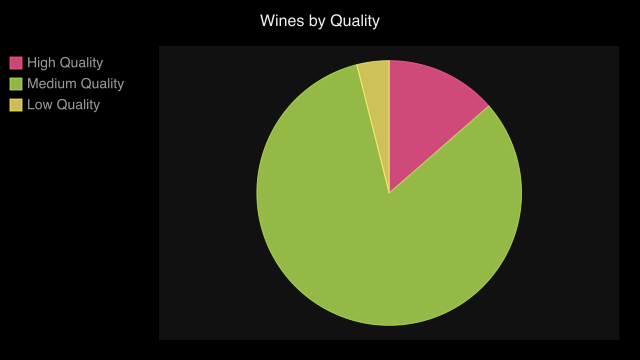

In [13]:
pie_chart.add('High Quality', num_high_quality)
pie_chart.add('Medium Quality', num_med_quality)
pie_chart.add('Low Quality', num_low_quality)

As the above chart is not interactive 

Below is the **method to print the interactive graph** in the jupyter notebook. HTML template is defined and rendered chart is passed inside the HTML template and displayed. 

In [14]:
from IPython.display import display, HTML

html_skeleton = """
<!DOCTYPE html>
<html>
  <head>
  <script type="text/javascript" 
          src="http://kozea.github.com/pygal.js/javascripts/svg.jquery.js">
  </script>
  <script type="text/javascript" 
          src="https://kozea.github.io/pygal.js/2.0.x/pygal-tooltips.min.js"">
  </script>
  </head>
  <body>
    <figure>
      {rendered_chart}
    </figure>
  </body>
</html>
"""

def display_chart(chart):
    rendered_chart = chart.render(is_unicode=True)
    plot_html = html_skeleton.format(rendered_chart=rendered_chart)
    display(HTML(plot_html))

In [15]:
display_chart(pie_chart)

Now, the chart is interactive. After the **display_chart** method is used to display the chart, **non-interactive** chart will also turn into interactive one. 


### Create a donut. (Aesthetic tweak)

Create a **Donut** by sepcifying a paramerter **inner_radius**

In [16]:
pie_chart = pygal.Pie(width = 640,
                      height = 360,
                      explicit_size = True,
                      style = DarkStyle,
                      inner_radius = .5)

In [17]:
pie_chart.title = 'Wines by Quality'

pie_chart.add('High Quality', num_high_quality)
pie_chart.add('Medium Quality', num_med_quality)
pie_chart.add('Low Quality', num_low_quality)

display_chart(pie_chart)

In [18]:
pie_chart = pygal.Pie(width = 640,
                      height = 360,
                      explicit_size = True,
                      style = DarkStyle,
                      half_pie = True)

In [19]:
pie_chart.title = 'Wines by Quality'

pie_chart.add('High Quality', num_high_quality)
pie_chart.add('Medium Quality', num_med_quality)
pie_chart.add('Low Quality', num_low_quality)

display_chart(pie_chart)

In [20]:
pie_chart = pygal.Pie(width = 640,
                      height = 360,
                      explicit_size = True,
                      style = DarkStyle,
                      half_pie = True, 
                      inner_radius = .5)

In [21]:
pie_chart.title = 'Wines by Quality'

pie_chart.add('High Quality', num_high_quality)
pie_chart.add('Medium Quality', num_med_quality)
pie_chart.add('Low Quality', num_low_quality)

display_chart(pie_chart)

## Multi Series Pie
**Increasing the granuality**

You can create a Pie chart by specifying the inner details of share of a Pie. For example, there are **three** shares in pie. You can specify the sub-parts in each one of them, which will tell what each part consists of. 

In [ ]:
counts_df

In [22]:
pie_chart = pygal.Pie(width = 640,
                      height = 360,
                      explicit_size = True,
                      style = DarkStyle)

pie_chart.title = 'Wines by Quality'

In [23]:
pie_chart.add('Low Quality', 
              [counts_df[3], counts_df[4]])

pie_chart.add('Medium Quality', 
              [counts_df[5], counts_df[6]])

pie_chart.add('High Quality', 
              [counts_df[7], counts_df[8]])

display_chart(pie_chart)

In [24]:
pie_chart = pygal.Pie(width = 640,
                      height = 360,
                      explicit_size = True,
                      style = DarkStyle)

pie_chart.title = 'Wines by Quality'

In [25]:
pie_chart.add('Low Quality', 
              [{'value': counts_df[3], 'label': '3'}, 
               {'value': counts_df[4], 'label': '4'}])

pie_chart.add('Medium Quality', 
              [{'value': counts_df[5], 'label': '5'}, 
               {'value': counts_df[6], 'label': '6'}])

pie_chart.add('High Quality', 
              [{'value': counts_df[7], 'label': '7'}, 
               {'value': counts_df[8], 'label': '8'}])

display_chart(pie_chart)

There are two circles. 
- Inner circle is the regual pie that shows the percentage of the Quality of the wine. 
- The outer circle shows the break up the each part. 